In [2]:
!pip install pandas

  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]━━━━ 1/2 [pandas]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install networkx matplotlib python-louvain


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

edges = pd.read_csv("twitch/ENGB/musae_ENGB_edges.csv")

edges.head(), len(edges)

(   from    to
 0  6194   255
 1  6194   980
 2  6194  2992
 3  6194  2507
 4  6194   986,
 35324)

In [6]:
G = nx.from_pandas_edgelist(edges, source="from", target="to")

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 7126
Edges: 35324


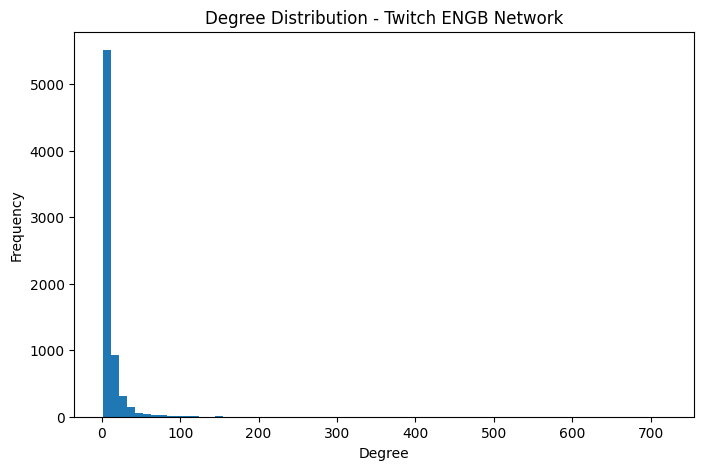

In [7]:
degrees = [d for _, d in G.degree()]

plt.figure(figsize=(8,5))
plt.hist(degrees, bins=70)
plt.title("Degree Distribution - Twitch ENGB Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

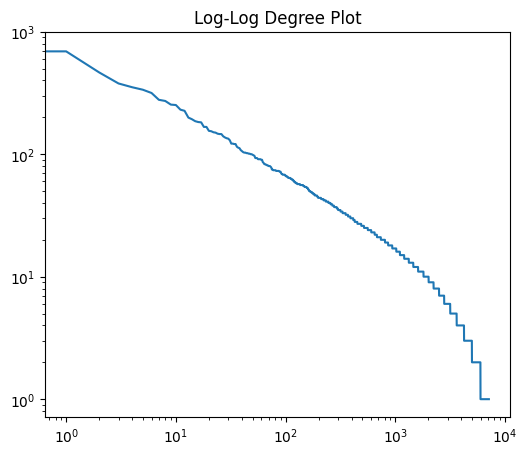

In [8]:
plt.figure(figsize=(6,5))
plt.loglog(sorted(degrees, reverse=True))
plt.title("Log-Log Degree Plot")
plt.show()

In [9]:
avg_cluster = nx.average_clustering(G)
avg_cluster

0.1309282190147198

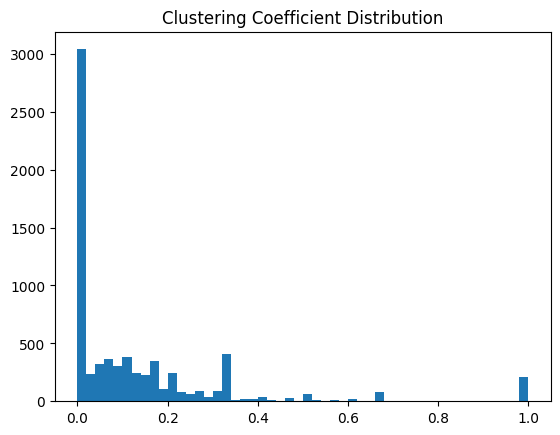

In [10]:
local_cluster = list(nx.clustering(G).values())

plt.hist(local_cluster, bins=50)
plt.title("Clustering Coefficient Distribution")
plt.show()

In [11]:
largest_cc = max(nx.connected_components(G), key=len)
Gcc = G.subgraph(largest_cc).copy()

len(Gcc.nodes()), len(Gcc.edges())

(7126, 35324)

In [12]:
import random, numpy as np

sample_nodes = random.sample(list(Gcc.nodes()), 100)
lengths = []

for n in sample_nodes:
    sp = nx.single_source_shortest_path_length(Gcc, n)
    lengths.extend(sp.values())

avg_path = np.mean(lengths)
avg_path

np.float64(3.7255795677799606)

In [13]:
import community as community_louvain

partition = community_louvain.best_partition(G)
len(set(partition.values()))

17

In [14]:
sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:10]

[(1773, 0.10105263157894737),
 (4949, 0.09698245614035086),
 (3401, 0.06526315789473684),
 (6136, 0.053052631578947365),
 (166, 0.049403508771929824),
 (5842, 0.0471578947368421),
 (1924, 0.04435087719298245),
 (2732, 0.03901754385964912),
 (2447, 0.038175438596491224),
 (1103, 0.03564912280701754)]

In [15]:
sorted(nx.betweenness_centrality(G, k=100).items(), key=lambda x: x[1], reverse=True)[:10]

[(1773, 0.11003522845003885),
 (4949, 0.09567765661449218),
 (3401, 0.07804949299605493),
 (5842, 0.06806166488487968),
 (2447, 0.052029273433994085),
 (166, 0.04082993519277442),
 (1924, 0.0319627393138879),
 (6136, 0.030434577431242445),
 (1598, 0.023728121291381663),
 (4374, 0.022672502397649532)]

In [16]:
sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)[:10]

[(1773, 0.010388048381822185),
 (4949, 0.009128956583272157),
 (3401, 0.006664533972347637),
 (6136, 0.005106483536329552),
 (166, 0.00420895226494763),
 (5842, 0.004132800431075655),
 (1924, 0.004076482391385805),
 (2732, 0.0037062560732973827),
 (581, 0.0035495465794162327),
 (1103, 0.0034134751992312743)]

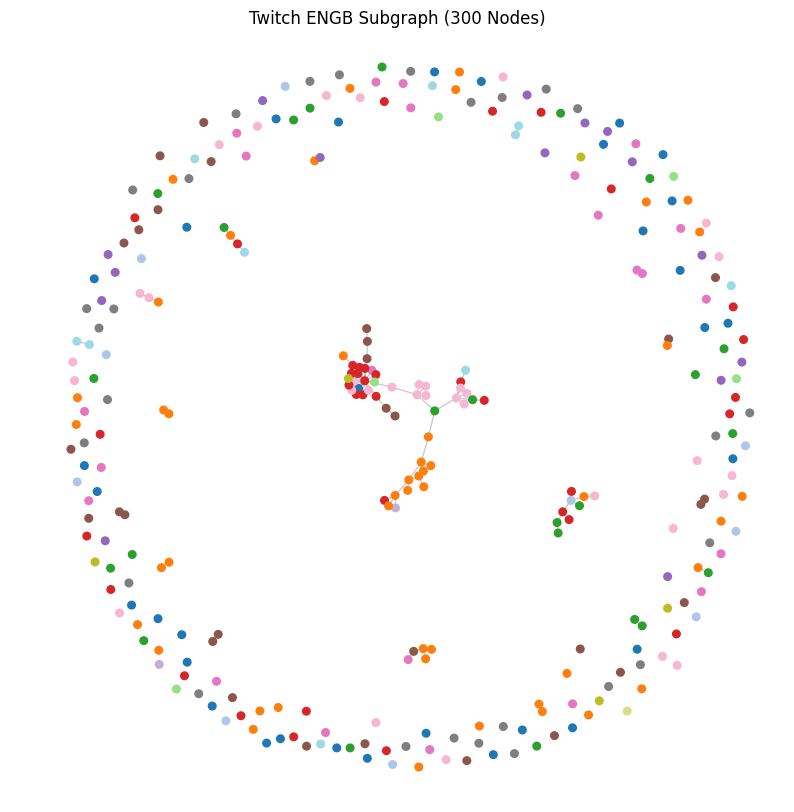

In [17]:
sample = random.sample(list(G.nodes()), 300)
H = G.subgraph(sample)

pos = nx.spring_layout(H)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(H, pos, node_size=30,
                       node_color=[partition[n] for n in H.nodes()], cmap="tab20")
nx.draw_networkx_edges(H, pos, alpha=0.2)
plt.title("Twitch ENGB Subgraph (300 Nodes)")
plt.axis("off")
plt.show()

In [18]:
import json

with open("twitch/ENGB/musae_ENGB_features.json") as f:
    features = json.load(f)

node_features = pd.DataFrame.from_dict(features, orient="index")
node_features.head()

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
3032,2605,1191,357,2120,861,231,3164,920,1907,1612.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4032,1521,1191,2334,846,3103,3045,920,224,810,1369.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3945,1550,3152,146,2203,846,673,2063,920,224,3097.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4677,308,3152,357,692,653,181,861,920,1907,2185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5137,515,294,3022,2024,846,654,48,920,1144,1761.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
labels = pd.read_csv("twitch/ENGB/musae_ENGB_target.csv")
labels.head()

,id,days,mature,views,partner,new_id
0,73045350,1459,False,9528,False,2299
1,61573865,1629,True,3615,False,153
2,171688860,411,True,46546,False,397
3,117338954,953,True,5863,False,5623
4,135804217,741,True,5594,False,5875


In [22]:
labels.columns

Index(['id', 'days', 'mature', 'views', 'partner', 'new_id'], dtype='object')

In [23]:
label_col = [c for c in labels.columns if c not in ("id", "node_id")][0]
label_col

'days'

In [24]:
node_id_col = "id" if "id" in labels.columns else "node_id"
label_dict = dict(zip(labels[node_id_col], labels[label_col]))

In [25]:
same_label_edges = 0
total_edges = 0

for u, v in G.edges():
    if u in label_dict and v in label_dict:
        total_edges += 1
        if label_dict[u] == label_dict[v]:
            same_label_edges += 1

homophily = same_label_edges / total_edges if total_edges > 0 else None
homophily

In [26]:
labels['degree'] = labels[node_id_col].map(dict(G.degree()))
labels['clustering'] = labels[node_id_col].map(nx.clustering(G))

labels.groupby(label_col)[['degree','clustering']].mean()

,degree,clustering
days,,
84,NaN,NaN
131,NaN,NaN
133,NaN,NaN
151,NaN,NaN
165,NaN,NaN
...,...,...
3990,NaN,NaN
3998,NaN,NaN
4044,NaN,NaN
